In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import numpy as np
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/NUS/Text Mining /Project/labeled_data.csv')
print("Shape of data=>",df.shape)

Shape of data=> (24783, 7)


In [ ]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df = df.drop(["Unnamed: 0","count","hate_speech","offensive_language","neither"],axis = 1)

In [ ]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
def pre_process(row):
    #print("hi")
    x = row['tweet']
    sent = re.sub(r'(RT\s)?@.*:','',x)
    sent = re.sub(r'rt','',sent)
    sent = re.sub(r'amp','',sent)
    sent = sent.encode("ascii", "ignore") # to remove unicode characters
    sent = sent.decode()
    sent = re.sub(r'[^\w\s]','',sent)
    tokens = nltk.word_tokenize(sent)
    #print(tokens)
    final_sent = []
    stopwords = nltk.corpus.stopwords.words('english')
    final_sent = [word.lower() for word in tokens if word.lower() not in stopwords]
    #print(final_sent)
    return row[0],' '.join(final_sent)

In [ ]:
result = df.apply(pre_process, axis=1)
df2 = pd.DataFrame(result.tolist(), columns=['class', 'tweet'])

In [ ]:
df2.head()

,class,tweet
0,2,woman shouldnt complain cleaning house man alw...
1,1,boy dats coldtyga dwn bad cuffin dat hoe 1st p...
2,1,ever fuck bitch sta cry confused shit
3,1,viva_based look like tranny
4,1,shit hear might true might faker bitch told ya...


In [ ]:
# # s = '!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!'
# s = "!!! rt
# # x2 = re.sub(r'(RT\s)?@.*:','',s)
# x2 = re.sub(r'rt','',s)
# print(x2)

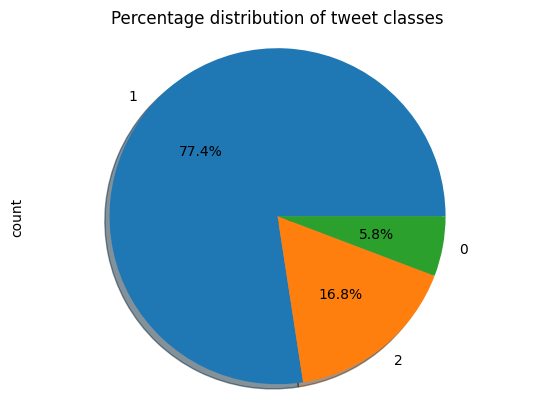

In [ ]:
counts = df2['class'].value_counts(dropna=False)
counts.plot.pie(autopct='%1.1f%%', labels=['1','2','0'], shadow=True)

plt.title('Percentage distribution of tweet classes')

plt.axis('equal')
plt.show()

array([[<Axes: title={'center': 'class'}>]], dtype=object)

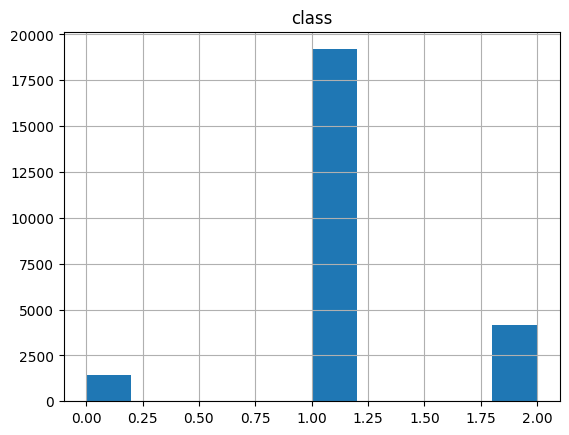

In [ ]:
df2.hist(column='class')

In [ ]:
df2['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

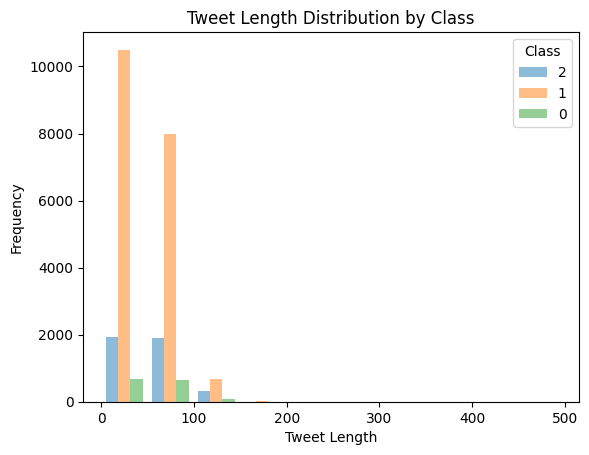

In [ ]:
class_lengths = {}
for cls in df2['class'].unique():
    class_lengths[cls] = df2[df2['class'] == cls]['tweet'].apply(len)

# Plot histogram for each class on the same graph
plt.hist(class_lengths.values(), bins=10, alpha=0.5, label=list(class_lengths.keys()))
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Tweet Length Distribution by Class')
plt.legend(title='Class')
plt.show()

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df2['tweet'], 20)
for word, freq in common_words:
    print(word, freq)

bitch 7631
bitches 2872
like 2599
hoes 2178
im 1985
pussy 1938
hoe 1740
dont 1681
got 1526
ass 1511
fuck 1352
shit 1206
nigga 1110
aint 1101
trash 1020
lol 994
8220 775
know 774
niggas 754
love 653


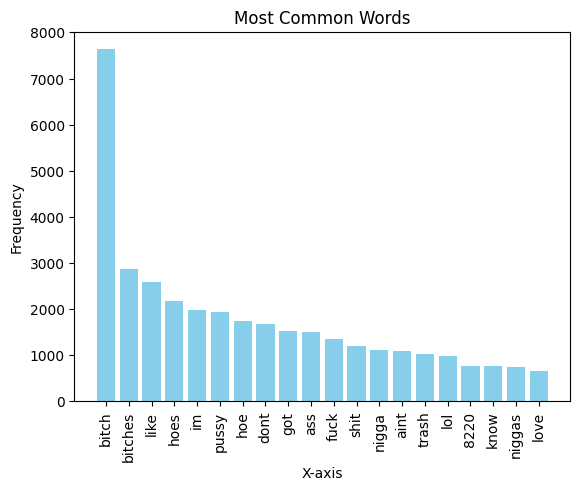

In [ ]:
y_values = [item[1] for item in common_words]

# Extract x labels from the list of tuples
x_labels = [item[0] for item in common_words]

# Plotting the histogram
plt.bar(x_labels, y_values, color='skyblue')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Frequency')
plt.title('Most Common Words')
plt.xticks(rotation=90)
# Show plot
plt.show()

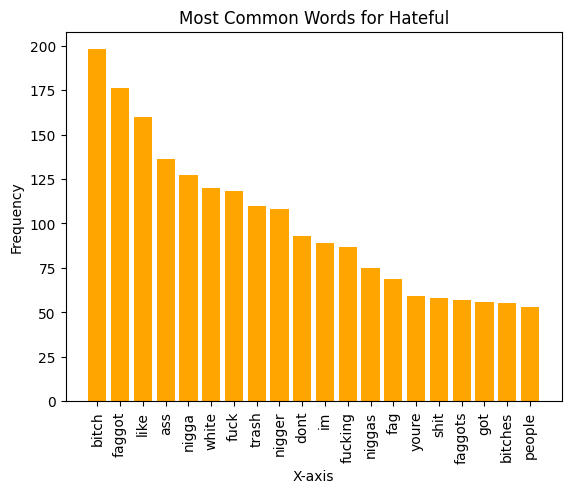

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df2.loc[df2['class']==0]['tweet'], 20)
y_values = [item[1] for item in common_words]

# Extract x labels from the list of tuples
x_labels = [item[0] for item in common_words]

# Plotting the histogram
plt.bar(x_labels, y_values, color='orange')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Frequency')
plt.title('Most Common Words for Hateful')
plt.xticks(rotation=90)
# Show plot
plt.show()

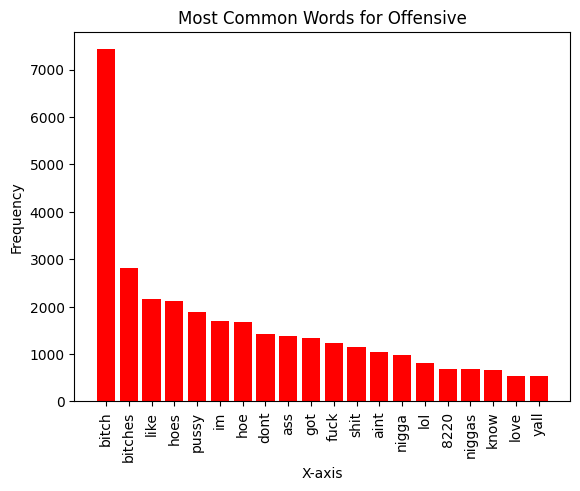

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df2.loc[df2['class']==1]['tweet'], 20)
y_values = [item[1] for item in common_words]

# Extract x labels from the list of tuples
x_labels = [item[0] for item in common_words]

# Plotting the histogram
plt.bar(x_labels, y_values, color='red')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Frequency')
plt.title('Most Common Words for Offensive')
plt.xticks(rotation=90)
# Show plot
plt.show()

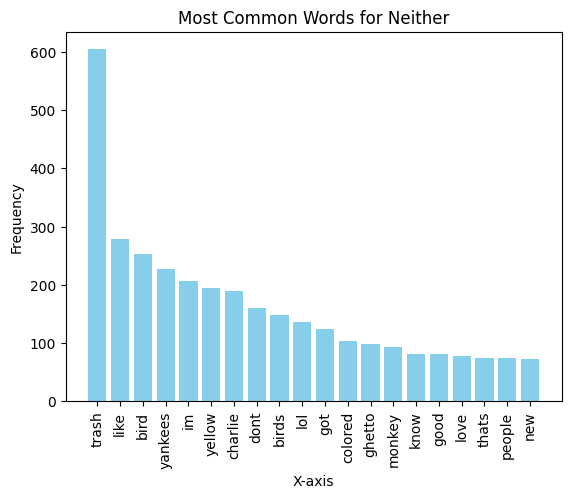

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df2.loc[df2['class']==2]['tweet'], 20)
y_values = [item[1] for item in common_words]

# Extract x labels from the list of tuples
x_labels = [item[0] for item in common_words]

# Plotting the histogram
plt.bar(x_labels, y_values, color='skyblue')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Frequency')
plt.title('Most Common Words for Neither')
plt.xticks(rotation=90)
# Show plot
plt.show()

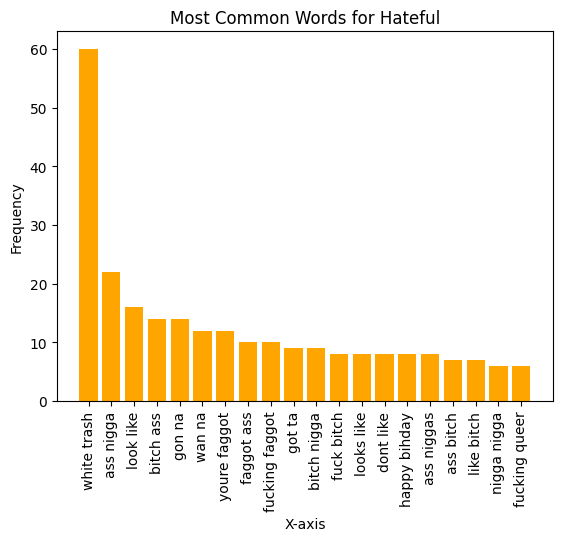

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df2.loc[df2['class']==0]['tweet'], 20)
y_values = [item[1] for item in common_words]

# Extract x labels from the list of tuples
x_labels = [item[0] for item in common_words]

# Plotting the histogram
plt.bar(x_labels, y_values, color='orange')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Frequency')
plt.title('Most Common Words for Hateful')
plt.xticks(rotation=90)
# Show plot
plt.show()

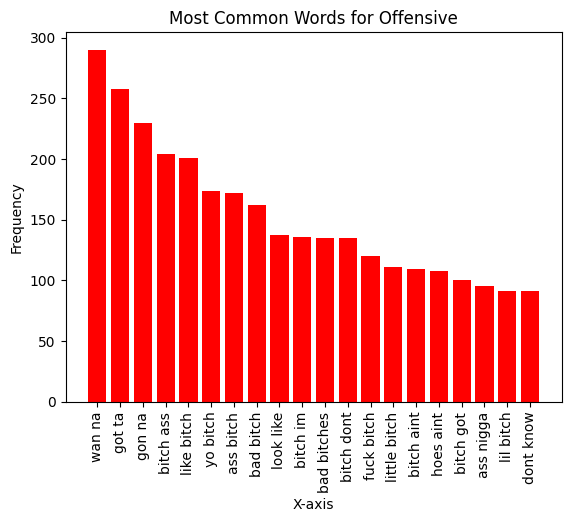

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df2.loc[df2['class']==1]['tweet'], 20)
y_values = [item[1] for item in common_words]

# Extract x labels from the list of tuples
x_labels = [item[0] for item in common_words]

# Plotting the histogram
plt.bar(x_labels, y_values, color='red')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Frequency')
plt.title('Most Common Words for Offensive')
plt.xticks(rotation=90)
# Show plot
plt.show()

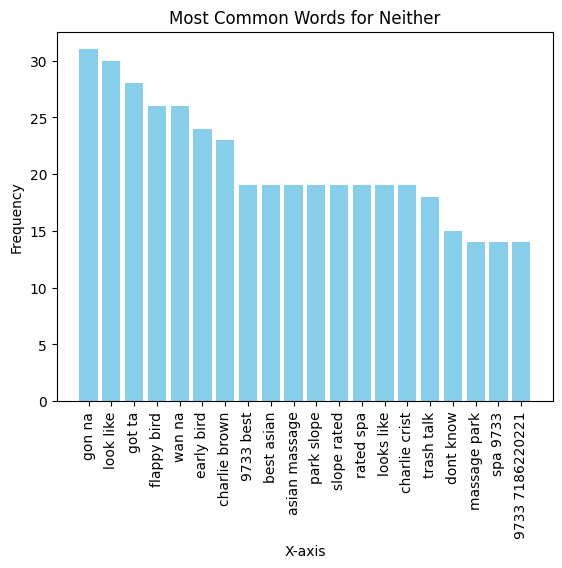

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df2.loc[df2['class']==2]['tweet'], 20)
y_values = [item[1] for item in common_words]

# Extract x labels from the list of tuples
x_labels = [item[0] for item in common_words]

# Plotting the histogram
plt.bar(x_labels, y_values, color='skyblue')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Frequency')
plt.title('Most Common Words for Neither')
plt.xticks(rotation=90)
# Show plot
plt.show()

## LSTM

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import tensorflow
from keras.utils import to_categorical
from keras import backend as K

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['class'], test_size=0.2, random_state=42)

In [ ]:
tokenizer = Tokenizer()
# build the vocabulary based on train dataset
tokenizer.fit_on_texts(X_train)
# tokenize the train and test dataset
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# vocabulary size (num of unique words) -> will be used in embedding layer
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
max_length = max(len(seq) for seq in X_train)

# to test an outlier case (if one of the test dataset has longer length)
for x in X_test:
    if len(x) > max_length:
        print(f"an outlier detected: {x}")

X_train = pad_sequences(X_train, maxlen = max_length)
X_test = pad_sequences(X_test, maxlen = max_length)

an outlier detected: [4, 75, 90, 117, 17, 830, 1, 3538, 13, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 52]
an outlier detected: [45, 972, 282, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 175, 1, 139, 282, 100, 316, 29, 36, 2, 33]


In [ ]:
# create hot_labels (idk whty tapi ini penting, kalo ga bakal error)
y_test = to_categorical(y_test, num_classes=3)
y_train = to_categorical(y_train, num_classes=3)

In [ ]:
print(f"num test tweet: {y_test.shape[0]}")
print(f"num train tweet: {y_train.shape[0]}")

num test tweet: 4957
num train tweet: 19826


In [ ]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precisions = precision(y_true, y_pred)
    recalls = recall(y_true, y_pred)
    return 2*((precisions*recalls)/(precisions+recalls+K.epsilon()))

In [ ]:
output_dim = 200

# LSTM model architechture (CNN + LSTM)
model = Sequential([
    # embedding layer is like idk
    Embedding(vocab_size, output_dim, input_length=max_length),
    # lstm for xxx
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    # dropout to prevent overfitting
    Dropout(0.5),
    # dense to connect the previous output with current layer
    Dense(128, activation="relu"),
    # dropout to prevent overfitting
    Dropout(0.5),
    # this is output layer, with 3 class (0, 1, 2)
    Dense(3, activation="softmax"),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1,precision, recall])

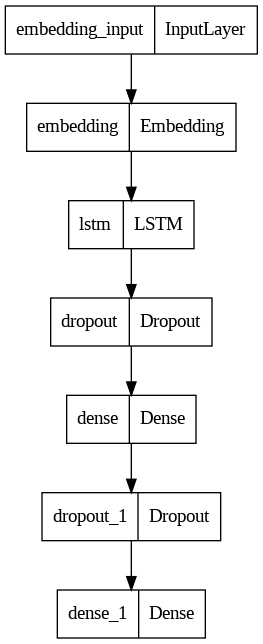

In [ ]:
tensorflow.keras.utils.plot_model(model)

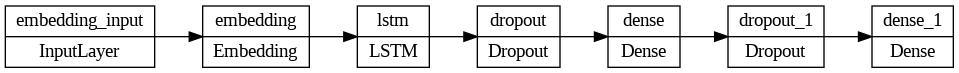

In [ ]:
tensorflow.keras.utils.plot_model(model,rankdir="LR")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 77, 200)           6303800   
                                                                 
 lstm (LSTM)                 (None, 64)                67840     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 6380347 (24.34 MB)
Trainable params: 63803

In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
310/310 [==============================] - 106s 322ms/step - loss: 0.4729 - accuracy: 0.8355 - f1: 0.8089 - precision: 0.8415 - recall: 0.7860 - val_loss: 0.3261 - val_accuracy: 0.8888 - val_f1: 0.8889 - val_precision: 0.9108 - val_recall: 0.8685
Epoch 2/10
310/310 [==============================] - 99s 319ms/step - loss: 0.2347 - accuracy: 0.9219 - f1: 0.9211 - precision: 0.9330 - recall: 0.9099 - val_loss: 0.3217 - val_accuracy: 0.8927 - val_f1: 0.8938 - val_precision: 0.9026 - val_recall: 0.8853
Epoch 3/10
310/310 [==============================] - 100s 322ms/step - loss: 0.1335 - accuracy: 0.9540 - f1: 0.9540 - precision: 0.9570 - recall: 0.9510 - val_loss: 0.4229 - val_accuracy: 0.8780 - val_f1: 0.8790 - val_precision: 0.8814 - val_recall: 0.8767
Epoch 4/10
310/310 [==============================] - 98s 317ms/step - loss: 0.0742 - accuracy: 0.9755 - f1: 0.9753 - precision: 0.9761 - recall: 0.9746 - val_loss: 0.4388 - val_accuracy: 0.8832 - val_f1: 0.8841 - val_precision

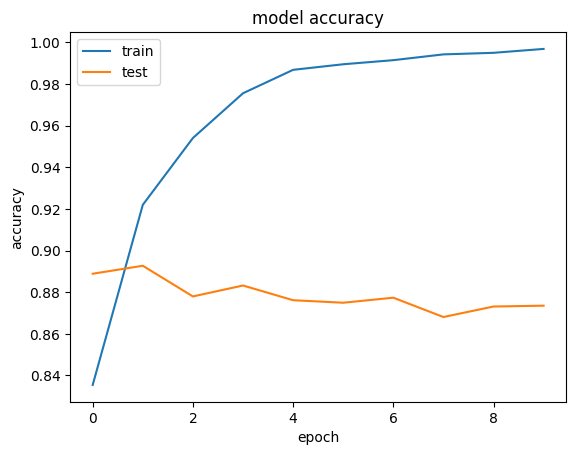

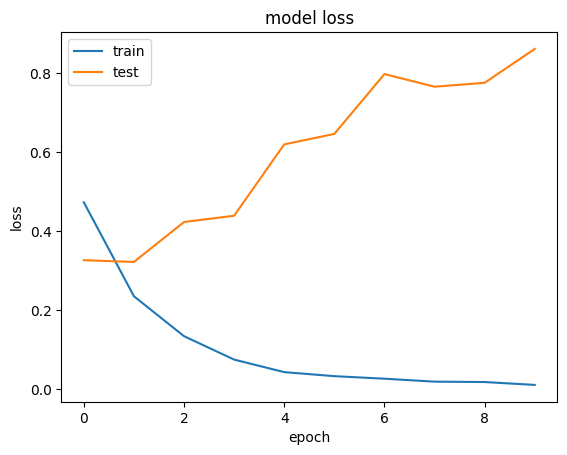

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()